<a href="https://colab.research.google.com/github/Saieesh2002/ML_OCR_FINAL/blob/main/ML_FINAL_OCR_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt

In [ ]:
from numpy import mean
from numpy import std
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD

In [ ]:
def load_dataset():
 # load dataset
 (train_X, train_Y), (test_X, test_Y) = mnist.load_data()
 # reshape dataset to have a single channel
 train_X = train_X.reshape((train_X.shape[0], 28, 28, 1))
 test_X = test_X.reshape((test_X.shape[0], 28, 28, 1))
 # one hot encode target values
 train_Y = to_categorical(train_Y)
 test_Y = to_categorical(test_Y)
 return train_X, train_Y, test_X, test_Y

In [ ]:
def prep_pixels(train, test):
 # convert from integers to floats
 train_norm = train.astype('float32')
 test_norm = test.astype('float32')
 # normalize to range 0-1
 train_norm = train_norm / 255.0
 test_norm = test_norm / 255.0
 # return normalized images
 return train_norm, test_norm

In [ ]:
def define_model():
 model = Sequential()
 model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
 model.add(MaxPooling2D((2, 2)))
 model.add(Flatten())
 model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
 model.add(Dense(10, activation='softmax'))
 # compile model
 opt = SGD(learning_rate=0.01, momentum=0.9)
 model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
 return model


In [ ]:
def evaluate_model(dataX, dataY, n_folds=5):
 scores, histories = list(), list()
 # prepare cross validation
 kfold = KFold(n_folds, shuffle=True, random_state=1)
 # enumerate splits
 for train_ix, test_ix in kfold.split(dataX):
 # define model
    model = define_model()
 # select rows for train and test
    train_X, train_Y, test_X, test_Y = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
 # fit model
    history = model.fit(train_X, train_Y, epochs=10, batch_size=32, validation_data=(test_X, test_Y), verbose=0)
 # evaluate model
    _, acc = model.evaluate(test_X, test_Y, verbose=0)
    print('> %.3f' % (acc * 100.0))
 # stores scores
    scores.append(acc)
    histories.append(history)
    return scores, histories

In [ ]:
def summarize_diagnostics(histories):
 for i in range(len(histories)):
 # plot loss
  plt.subplot(2, 1, 1)
  plt.title('Cross Entropy Loss')
  plt.plot(histories[i].history['loss'], color='blue', label='train')
  plt.plot(histories[i].history['val_loss'], color='orange', label='test')
  # plot accuracy
  plt.subplot(2, 1, 2)
  plt.title('Classification Accuracy')
  plt.plot(histories[i].history['accuracy'], color='blue', label='train')
  plt.plot(histories[i].history['val_accuracy'], color='orange', label='test')
  plt.show()

In [ ]:
def summarize_performance(scores):
 # print summary
 print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
 # box and whisker plots of results
 plt.boxplot(scores)
 plt.show()

In [ ]:
def run_test_harness():
 # load dataset
 train_X, train_Y, test_X, test_Y = load_dataset()
 # prepare pixel data
 train_X, test_X = prep_pixels(train_X, test_X)
 # evaluate model
 scores, histories = evaluate_model(train_X, train_Y)
 # learning curves
 summarize_diagnostics(histories)
 # summarize estimated performance
 summarize_performance(scores)

11490434/11490434 [==============================] - 1s 0us/step
> 98.600


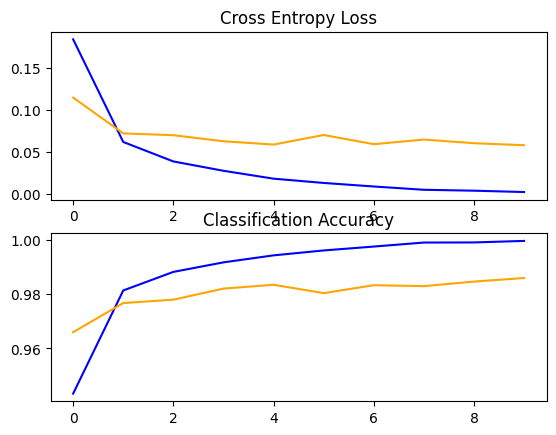

Accuracy: mean=98.600 std=0.000, n=1


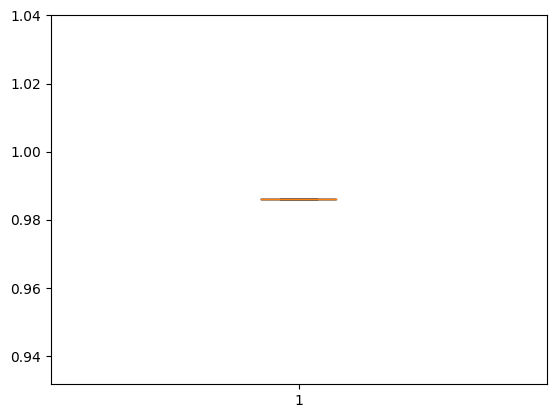

In [ ]:
run_test_harness()

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image

# ... (previous code remains the same)

# Function to make predictions on new data
def predict_new_data(model, image_path):
    # Load and preprocess the image
    img = image.load_img(image_path, target_size=(28, 28), grayscale=True)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize to range 0-1

    # Make prediction
    prediction = model.predict(img_array)
    class_label = np.argmax(prediction)

    return class_label

# Function to get user input and make predictions
def get_user_input_and_predict(model):
    while True:
        # Get the path to the image from the user
        image_path = input("Enter the path to the image file (or 'exit' to quit): ")

        if image_path.lower() == 'exit':
            break

        try:
            # Make predictions
            class_label = predict_new_data(model, image_path)
            print(f"Predicted class label: {class_label}")
        except Exception as e:
            print(f"Error: {e}")

# run_test_harness()  # Comment out the original test harness

# Load the model
model = define_model()

# Get user input and make predictions
get_user_input_and_predict(model)